In [34]:
import pandas as pd
import numpy as np
from google.colab import files

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
dataset = pd.read_csv('drive/MyDrive/data_CKD_MI.csv')

In [37]:
dataset.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48,80,1.020,1,0,0,1,0,0,121,...,44,7800,5.2,1,2,0,0,0,0,0
1,7,50,1.020,4,0,1,1,0,0,121,...,38,6000,4.8,0,1,0,0,0,0,0
2,62,80,1.010,2,3,1,1,0,0,423,...,31,7500,4.8,0,2,0,1,0,1,0
3,48,70,1.005,4,0,1,0,1,0,117,...,32,6700,3.9,1,1,0,1,1,1,0
4,51,80,1.010,2,0,1,1,0,0,106,...,35,7300,4.6,0,1,0,0,0,0,0


In [38]:
dataset = dataset[['sg','al','su','rbc','pc','pcc','bgr','bu','sc','hemo','pcv','htn','dm','appet','pe','classification']] #forward SNS

In [39]:
dataset

,sg,al,su,rbc,pc,pcc,bgr,bu,sc,hemo,pcv,htn,dm,appet,pe,classification
0,1.020,1,0,0,1,0,121,36.0,1.2,15.4,44,1,2,0,0,0
1,1.020,4,0,1,1,0,121,18.0,0.8,11.3,38,0,1,0,0,0
2,1.010,2,3,1,1,0,423,53.0,1.8,9.6,31,0,2,1,0,0
3,1.005,4,0,1,0,1,117,56.0,3.8,11.2,32,1,1,1,1,0
4,1.010,2,0,1,1,0,106,26.0,1.4,11.6,35,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1.020,0,0,1,1,0,140,49.0,0.5,15.7,47,0,1,0,0,1
396,1.025,0,0,1,1,0,75,31.0,1.2,16.5,54,0,1,0,0,1
397,1.020,0,0,1,1,0,100,26.0,0.6,15.8,49,0,1,0,0,1
398,1.025,0,0,1,1,0,114,50.0,1.0,14.2,51,0,1,0,0,1


In [ ]:
dataset.shape

(400, 16)

In [ ]:
dataset.iloc[:,-1]

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: classification, Length: 400, dtype: int64

In [40]:
# Data preprocessing
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [ ]:
X

array([[1.02 , 1.   , 0.   , ..., 2.   , 0.   , 0.   ],
       [1.02 , 4.   , 0.   , ..., 1.   , 0.   , 0.   ],
       [1.01 , 2.   , 3.   , ..., 2.   , 1.   , 0.   ],
       ...,
       [1.02 , 0.   , 0.   , ..., 1.   , 0.   , 0.   ],
       [1.025, 0.   , 0.   , ..., 1.   , 0.   , 0.   ],
       [1.025, 0.   , 0.   , ..., 1.   , 0.   , 0.   ]])

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [41]:
from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import MinMaxScaler

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [43]:
X_train.shape

(300, 15)

In [44]:
scaler = MinMaxScaler()

In [ ]:
X_test.shape

(100, 21)

In [ ]:
y_test.shape

(100,)

In [ ]:
y_test

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0])

In [45]:
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [ ]:
# # Reshaping X_train for efficient modelling
# X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
# X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [46]:
from keras.models import Sequential
from tensorflow import keras
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
#from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [47]:
import time
start_time = time.time()
#build the model
# sequential
#3 layers firtst 2 nurons and relu function
#output layer 10 nuron softmax function
model = Sequential()
model.add(keras.layers.Dense (15,input_shape=(X_train.shape[1],),activation='relu')) #input layer
model.add(keras.layers.Dense (10,activation='relu')) #hidden
model.add(keras.layers.Dense (1,activation='sigmoid')) #output
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train,y_train,epochs=100,validation_data=(X_test, y_test))
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/100
10/10 [==============================] - 1s 25ms/step - loss: 0.6970 - accuracy: 0.6100 - val_loss: 0.6765 - val_accuracy: 0.6400
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 0.6692 - accuracy: 0.6167 - val_loss: 0.6536 - val_accuracy: 0.6500
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 0.6459 - accuracy: 0.6167 - val_loss: 0.6336 - val_accuracy: 0.6500
Epoch 4/100
10/10 [==============================] - 0s 9ms/step - loss: 0.6247 - accuracy: 0.6167 - val_loss: 0.6132 - val_accuracy: 0.6500
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 0.6030 - accuracy: 0.6167 - val_loss: 0.5920 - val_accuracy: 0.6500
Epoch 6/100
10/10 [==============================] - 0s 9ms/step - loss: 0.5810 - accuracy: 0.6167 - val_loss: 0.5689 - val_accuracy: 0.6500
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 0.5565 - accuracy: 0.6167 - val_loss: 0.5446 - val_accuracy: 0.6500
Epoch 8/100


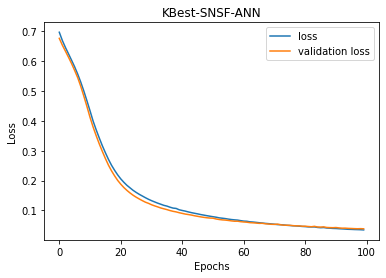

In [48]:
import matplotlib.pyplot as plt

fig = plt.gcf()
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('KBest-SNSF-ANN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'validation loss'], loc='upper right')
plt.show()
fig.savefig('KBest-SNSF-ANN.png', dpi=100)

In [49]:
from google.colab import files
files.download('KBest-SNSF-ANN.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [50]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

4/4 [==============================] - 0s 4ms/step


In [51]:
from sklearn.metrics import classification_report,confusion_matrix

In [52]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        65
           1       0.95      1.00      0.97        35

    accuracy                           0.98       100
   macro avg       0.97      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



In [53]:
print(confusion_matrix(y_test,predictions))

[[63  2]
 [ 0 35]]


In [54]:
cnf_matrix = [[63, 2],[0, 35]]

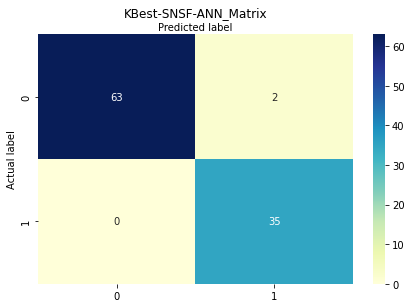

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True,cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('KBest-SNSF-ANN_Matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('KBest-SNSF-ANN_Matrix.png')
plt.show()

In [56]:
from google.colab import files
files.download('KBest-SNSF-ANN_Matrix.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df = pd.DataFrame.from_dict(data, orient='index')
df = df.transpose()

In [ ]:
df.to_csv('ann_Boruta_output.csv', index=False)

In [ ]:
# from google.colab import files
# files.download('ann_Boruta_output.csv') 